# CS4168 Data Mining

## Lab 3: Clustering & Manifold Learning

**David Walsh 20276885**

*To Do:*
* Use the k-means clustering algorithm and visualise the clustering. Pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.
* Plot the sum of squared distances from the data points to the k-Means clusters' centres for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), compute a new kMeans clustering.
* Implement and plot the results of the Silhouette method for determining the best value of k for k-Means. Compare the results of the Elbow method to the results of the Silhouette method.
* Apply another clustering algorithm (from the ones available in scikit-learn) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

### 1. Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.manifold import Isomap

In [2]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype = float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


### 2. Rescale the Data

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### 3. Scatterplot Function

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):

    # Getting amount of clusters
    n_clusters = np.unique(labels).size

    # Rendering each cluster
    for i in range(n_clusters):
        h = plt.scatter(points[labels == i, 0],
                        points[labels == i, 1],
                        c=colors[i % colors.size],
                        label = 'cluster ' + str(i))

    # Plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c = 'r', marker = '*', s = 500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### 4. K-Means Clustering

In [5]:
# Number of clusters k

k = 6

In [6]:
# Run k-Means

clustered_data_sklearn = cluster.KMeans(n_clusters = k, n_init = 10, max_iter = 300).fit(data)

### 5. Apply a manifold-learning technique to project the data set to a 2D space


In [7]:
# Append the cluster centers to the dataset

data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### 5.1 Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [8]:
# Project both the data and the k-Means cluster centers to 2D

XYcoordinates = manifold.MDS(n_components = 2).fit_transform(data_and_centers)
print("transformation complete")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


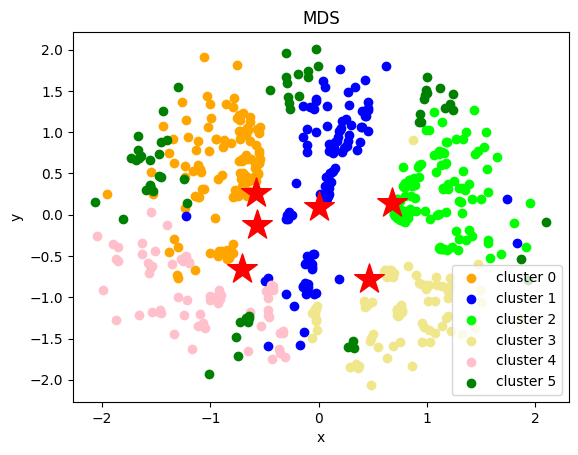

In [9]:
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples

clustering_scatterplot(points = XYcoordinates[:-k, :],
                       labels = clustered_data_sklearn.labels_,
                       centers = XYcoordinates[-k:, :],
                       title = 'MDS')

#### 5.2 Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [10]:
# Project both the data and the k-Means cluster centers to 2D

XYcoordinates = manifold.TSNE(n_components = 2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


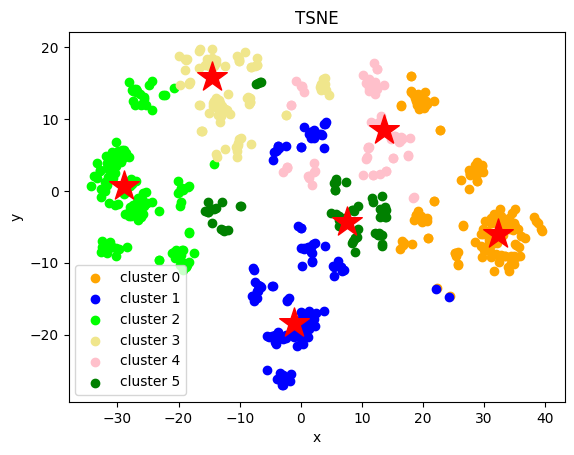

In [11]:
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

clustering_scatterplot(points=XYcoordinates[:-k, :],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:, :],
                       title = 'TSNE')

### 6. Cluster Analysis

In [12]:
# Add the cluster labels as an extra column in the original dataframe

df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index = df.index)

In [13]:
df.head(6)

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.082952,1.056390,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,0
1,1,0.333333,0.924041,1.045549,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,2,0.000000,0.681512,0.633249,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,0
3,3,0.000000,0.606463,1.000974,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,0
4,4,0.000000,1.100325,1.113997,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,0
5,5,0.666667,1.031515,1.609438,0.75,1.0,1,0,1,0,1,0,0,0,1,1,1.235628,0


In [14]:
df.tail(6)

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
608,608,0.000000,0.720949,0.930148,0.750,1.0,1,0,1,0,0,0,0,0,0,1,0.751473,1
609,609,0.000000,0.664021,0.673577,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,3
610,610,1.000000,0.856946,0.392461,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,1
611,611,0.333333,1.312470,1.565057,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,0
612,612,0.666667,1.266308,1.324336,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,0
613,613,0.000000,0.924041,1.072433,0.750,0.0,0,0,0,0,1,0,0,1,0,0,0.663523,3


In [15]:
# Compute the mean value of each attribute for each cluster

df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,263.903704,0.301235,0.934913,1.084713,0.681111,0.992593,0.970370,0.014815,0.822222,0.007407,0.103704,0.066667,0.177778,0.000000,1.000000,0.859259,0.882314
1,347.235772,0.273713,0.927781,1.119895,0.714228,0.983740,0.943089,0.024390,0.788618,0.000000,0.154472,0.065041,0.260163,0.000000,0.000000,0.796748,0.911422
2,297.266667,0.308642,0.920574,1.117656,0.720741,0.985185,0.844444,0.014815,1.000000,0.000000,0.133333,0.029630,0.177778,1.000000,0.000000,0.896296,0.899543
3,325.977778,0.103704,0.899526,0.996082,0.728056,0.911111,0.455556,0.022222,0.000000,0.022222,0.144444,0.055556,0.211111,0.866667,0.000000,0.777778,0.759580
4,292.253731,0.099502,0.874990,0.973938,0.738806,0.820896,0.447761,0.014925,0.029851,0.000000,0.149254,0.074627,0.223881,0.000000,0.731343,0.253731,0.796384
5,325.062500,0.317708,0.896453,1.089354,0.716797,0.000000,0.890625,0.046875,0.828125,0.000000,0.125000,0.015625,0.312500,0.312500,0.281250,0.000000,0.864274


### 7. Conclusions

From the table:
* **Cluster 0:** This group has the lowest Dependents and the highest Credit_History. The applicants in this group are predominantly not self-employed, have a high likelihood of being married, and live in urban areas with high loan approval status.

* **Cluster 1:** Has a higher number of Dependents and ApplicantIncome compared to cluster 0, with a slightly higher LoanAmount. They have the highest Loan_Amount_Term and the second-highest loan approval status.

* **Cluster 2:** Features moderate Dependents, the lowest ApplicantIncome among the clusters, moderate LoanAmount, and Loan_Amount_Term. It has excellent Credit_History with the highest loan approval status.

* **Cluster 3:** This group has the highest Dependents and the highest ApplicantIncome. They have good Credit_History, and there is a relatively high percentage of male applicants, with a moderate probability of being married and self-employed.

* **Cluster 4:** Has the smallest LoanAmount and the shortest Loan_Amount_Term. This cluster has the lowest Credit_History, a higher proportion of non-male applicants, the lowest likelihood of being married, the most individuals who are not graduates, and has the lowest loan approval status.

* **Cluster 5:** Has the second-highest Dependents and ApplicantIncome. This cluster has a very good Credit_History, the highest proportion of non-male applicants, and a moderate likelihood of being married.

### 8. Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-60420ab1b751>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_data["clusters"] = kmeans.labels_ # Assign the cluster labels to each sample in 'e_data'. These labels indicate the cluster to which each sample belongs.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-60420ab1b751>:10: SettingWithCopyW

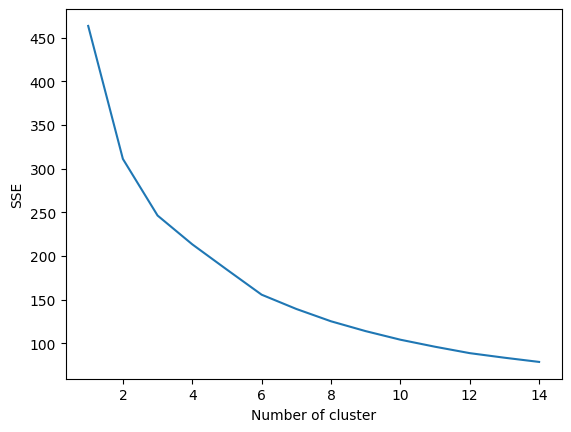

In [16]:
e_data = df[['Married_Yes', 'Dependents', 'TotalIncome', 'Self_Employed_Yes', 'LoanAmount']]

sse = {}

for k in range(1, 15):
    # Initialize a KMeans clustering model with 'k' clusters and a high number of maximum iterations to ensure convergence.
    # 'max_iter = 1000' specifies the maximum number of iterations for a single run.
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(e_data)

    e_data["clusters"] = kmeans.labels_ # Assign the cluster labels to each sample in 'e_data'. These labels indicate the cluster to which each sample belongs.

    # The 'inertia_' attribute of KMeans returns the sum of squared distances of samples to their closest cluster center.
    # This value is stored in the 'sse' dictionary with 'k' as the key.
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### 9. Silhouette Method

In [17]:
# Iterate over a range of cluster counts from 2 to 14 to find the optimal number of clusters for K-Means
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters = n_cluster).fit(data) # Initialize KMeans with the current number of clusters and fit it to the data

    label = kmeans.labels_ # Retrieve the labels of the data points after clustering
    sil_coeff = silhouette_score(data, label, metric = 'euclidean')

    print("For n_clusters = {}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, The Silhouette Coefficient is 0.1753123187851905


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, The Silhouette Coefficient is 0.1780667544470095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, The Silhouette Coefficient is 0.1791101414702853


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, The Silhouette Coefficient is 0.18763660016863648


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, The Silhouette Coefficient is 0.18945463265782556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, The Silhouette Coefficient is 0.2044141110308249


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, The Silhouette Coefficient is 0.19421559386944046


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, The Silhouette Coefficient is 0.20167911380798295


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, The Silhouette Coefficient is 0.20682202099361147


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, The Silhouette Coefficient is 0.20139040255712132


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, The Silhouette Coefficient is 0.198209515971011


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, The Silhouette Coefficient is 0.21302789910626968


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, The Silhouette Coefficient is 0.1929749012423487


### 10. Elbow Method vs. Silhouette Method


* The elbow method suggests the optimum amount of clusters being around 6.
* The silhouette method reveals that having 12 clusters result in the highest silhouette coefficients which is significantly more.

### 11. Trying Another Clustering Algorithm
Trying Spectral Clustering

In [18]:
# Spectral Clustering

spectral_clustering = SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors', random_state = 42)
spectral_labels = spectral_clustering.fit_predict(data)

In [19]:
# Isomap for dimensionality reduction for visualization

isomap = Isomap(n_components = 2)
isomap_projection = isomap.fit_transform(data)

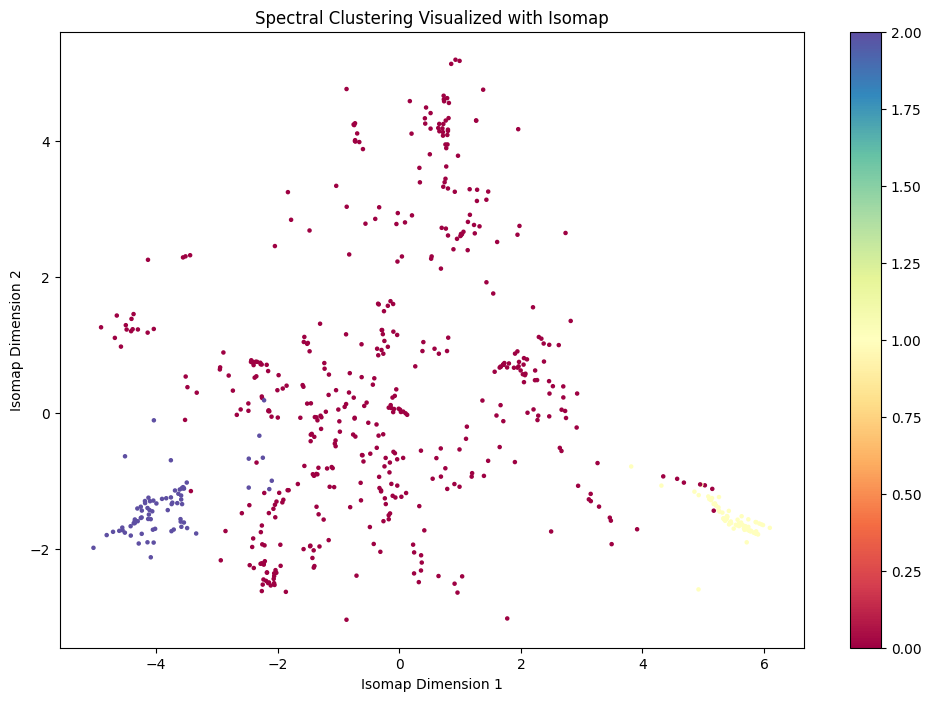

In [20]:
# Visualize the clustering

plt.figure(figsize = (12, 8))
plt.scatter(isomap_projection[:, 0], isomap_projection[:, 1], c = spectral_labels, cmap = 'Spectral', s = 5)
plt.colorbar()
plt.title('Spectral Clustering Visualized with Isomap')
plt.xlabel('Isomap Dimension 1')
plt.ylabel('Isomap Dimension 2')
plt.show()